#Self Organizing Map

##Install MiniSom Package

In [ ]:
# to use the SOM, there is no implementation of SOM in Sklearn
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Deep Learning A-Z: Hands-On Artificial Neural Networks/Part 4 - Self Organizing Maps/Self-Organizing-Maps/Credit_Card_Applications.csv')

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [ ]:
# the dataset contains information of customers from a bank applying for an advanced credit card, basically these informations are the data
# that custumers have to provide when filling the application form

# our mission is to detect potential fraud whithin these application, identifyng the name of the customers who potentially cheated

# this is not a supervised problem, so we need to identify some patterns in this high dimensional dataset full of non linear relationships and
# one of these patterns will be the potential fraud, the fraud will be an outlier because it will be far from the general rules
# to detect the outliers we use the MID (Mean Interneuron Distance) to compute in our SOM for each neuron the mean of the Euclidian Distance beetween
# each neuron and the neurons in the neighborhood, outliers will have a big MID value

# each row of the dataset is a customer and each column is an attribute
dataset

CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    100  1213      0  
1    160     1      0  
2    280     1      0  
3      0     1      1  
4     60   159      1  
..   ...   ...    ...  
685    0     1      1  
686    0    45      0  
687  100     1      1  
688  120    12      1  
689  560     1      1  

[690 rows x 16 columns]

In [ ]:
# we are doing unsupervisioned deep learning so we don't need the dependent variable, we will divide the dataset in X and Y
# but we will use only X

# X: contains all the variables, for the training we don't need of the first column 'CustomerID', but we will keep it because at the end we need 
#    to identify the name of the potential cheaters
# y: contains informations the tells if applications was approved (1 = Yes, 0 = No) 

X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
# Feature Scaling is compulsory for deep learning because there are high computations to make and it will be much easier for our
# deep learning model to be trained if the features are scaled

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
# the MiniSom takes some parameters
# - x: the horizontal dimension of the grid of the SOM, we can choose whatever dimension we want, not too small because we want to get the outliers
#      pretty in evidence, we don't have that much customers in our dataset so a 10 x 10 grid will be enough for us
# - y: the vertical dimension of the grid of the SOM
# - input_len: the number of features that we have in our dataset, not in the original but in X
# - sigma: the radius of the neighborhoods in the grid, we keep the default value 1.0
# - learning_rate: it decide how much the weights are updated during each iteration, higher is the learning rate and faster will be the convergence, 
#                  we keep the default value 0.5
# - decay_function: this can be used to improve the convergence but we will not use this 

from minisom import MiniSom

n_rows, n_features = X.shape
x_nodes, y_nodes = 10, 10

som = MiniSom(
    x = x_nodes, 
    y = y_nodes, 
    input_len = n_features, 
    sigma = 1.0, 
    learning_rate = 0.5
)

In [ ]:
# we need to random initialize the weights with numbers closed to 0, passing the dataset X to the function for the initialization

som.random_weights_init(X)

In [ ]:
# we start the train of the SOM, each time selecting 1 random observation point from the dataset, specifiyng the dataset X
# and the number of iterations to train our SOM 

som.train_random(
    data = X, 
    num_iteration = 100
)

##Visualizing the results


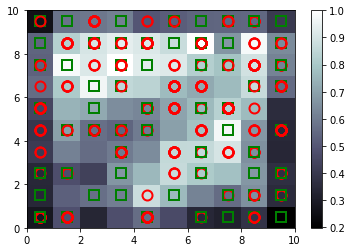

In [ ]:
# now that the model is trained we can plot the SOM in a 2 dimensional grid that will contain all the final winning nodes and for each of 
# these winning nodes we will get the MID, the MID of a specific winning node is the mean of the distances of all the neurons around the winning nodes
# inside a neighborhood that we had defined before in the sigma parameter of the model

# the higher is the MID and the more the winning node will be far away from its neighbors and the more it will be an outlier

# in the plot, the larges is the MID and the closest to white color will be the node

from pylab import bone, pcolor, colorbar, plot, show

# to initialize the window that will contain the map
bone() 

# the "distance_map" function return all the MID in a matrix object
mid_values = som.distance_map()

# to get things in the righe order for the "pcolor" function we need to transpose the matrix of the MID values 
pcolor(mid_values.T)

# to get the legend of the color userd in the matrix
colorbar()

# we can add some markers to the plot to make the distinction beetween the customers who got approval and the customers who didn't get approval
# because the customers who cheated and get the approval are more relevant targets to fraud detection tha the customers who didn't get approval and cheated

# we need 2 makers: red circles (customers who didn't get approval) and green squares (customers who got approval)
markers = ['o', 's'] # o = circle, s = square
colors = ['r', 'g'] # r = red, g = green

# for each elemend of the Training-Set we get the winning node for the customer, to do this we can use the funtion "winner",
# next we get the approval value from the vector of the dependent variable
# and finally we plot the marker specifiyng:
#  - his coordinates at the center of the winning node, to do this we add 0.5 to each coordinates, so we obtain the center 
#  - if use the red circle or the green square
#  - the size of the marker
for i, x in enumerate(X):
    w = som.winner(x)
    approval_flag = y[i]
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        marker = markers[approval_flag],
        markeredgecolor = colors[approval_flag],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
    )

show()

## Finding the frauds


In [ ]:
# for each node in the plot, we take the coordinated of the customers where the MID exceed a threshold value

threshold_value = 0.9
map_of_distance = som.distance_map().T
exceed_map = []

for i in range(0, x_nodes):
    for j in range (0, y_nodes):
        if map_of_distance[i, j] >= threshold_value:
            exceed_map.append((i, j))

print(exceed_map) # the nodes closest to white in the plot above, the x and y axis are reversed than usual

[(3, 7), (4, 7), (6, 2), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (8, 2), (8, 3), (8, 4), (8, 6), (8, 8)]


In [ ]:
# the function "win_map" give us a dictionary of all the mappings from the winning nodes to the customers, the keys of this dictionary
# are the coordinates of the winning nodes

# we take all the customers data where the MID exceed the threshold and inverse transform theyr values to obtain the ID

mappings = som.win_map(X)

mappings_exceed = []
for e in exceed_map:
    mappings_exceed = mappings_exceed + mappings[e]

frauds = sc.inverse_transform(mappings_exceed)

##Printing the Fraunch Clients

In [ ]:
print('All fraud Customer IDs:\n', frauds[:, 0])

All fraud Customer IDs:
 [15609070. 15728906. 15793317. 15729377. 15795079. 15773776. 15778345.
 15791769. 15776494. 15621546. 15636478. 15689781. 15585192. 15591552.
 15671582. 15611318. 15664083. 15690898. 15622507. 15640521. 15591248.
 15598266. 15593694. 15659031. 15571571. 15632669. 15701738. 15690169.
 15777994. 15704081. 15723884. 15697310. 15701081. 15722479. 15810723.
 15730360. 15766663. 15703177. 15697844. 15733602. 15706602. 15728082.
 15675176. 15693382. 15796787. 15768449. 15752601. 15740356. 15643056.
 15709252. 15701885. 15753550. 15724851. 15676156. 15738487. 15720725.
 15605791. 15571415. 15600975. 15565714. 15565996. 15644400. 15581871.
 15623668. 15686670. 15617065. 15624850. 15660263. 15632275. 15620103.
 15615176. 15588019. 15665590. 15575146. 15652667. 15611794. 15573520.
 15631685. 15609823. 15614813. 15594133. 15571081. 15706268. 15653147.
 15625501. 15687765. 15589541. 15598574. 15706762. 15711299. 15752578.
 15805261. 15778142. 15802106. 15812766. 15586183. 1

In [ ]:
fraudsId = frauds[:, 0]
ds_filt_by_fraud = dataset[dataset.CustomerID.isin(fraudsId)]
ds_filt_by_fraud = ds_filt_by_fraud.filter(items = ['CustomerID', 'Class'])
ds_filt_by_fraud_and_approved = ds_filt_by_fraud[ds_filt_by_fraud.Class == 1]
ds_filt_by_fraud_and_approved = ds_filt_by_fraud_and_approved.CustomerID.to_numpy()

print('Fraud Customer who got approved request IDs:\n', ds_filt_by_fraud_and_approved)

Fraud Customer and approved request IDs:
 [15631685 15738487 15621546 15777994 15704081 15571415 15723884 15636478
 15689781 15609070 15697310 15573520 15585192 15614813 15594133 15591552
 15701081 15571081 15706268 15671582 15611318 15778142 15810723 15802106
 15730360 15720725 15664083 15690898 15795079 15766663 15622507 15640521
 15591248 15598266 15593694 15703177 15589541 15659031 15697844 15733602
 15706602 15773776 15728082 15675176 15778345 15693382 15791769 15571571
 15598574 15796787 15768449 15752601 15701738 15690169 15740356 15776494]
